In [1]:
cd("/Users/lewis/Dropbox/Online Coursework/Covid/src"); 

In [198]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [37]:
using CovidSim

┌ Warning: /Users/lewis/.julia/packages/Plots/ninUP/src/Plots.jl/ is not an existing directory, Revise is not watching
└ @ Revise /Users/lewis/.julia/packages/Revise/jVsKo/src/Revise.jl:492


In [115]:
bismarck = (;fips=38015)
newyork=(;fips=36061)

(fips = 36061,)

In [278]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)
alldict, env, series = run_a_sim(180, bismarck.fips, showr0=false, silent=true,
        spreadcases=[],
        runcases=[seed_1_6]);
geo = alldict["geo"];

*** seed day 1 locale 38015....
Simulation completed for 180 days.


# Smaller City: No social distancing

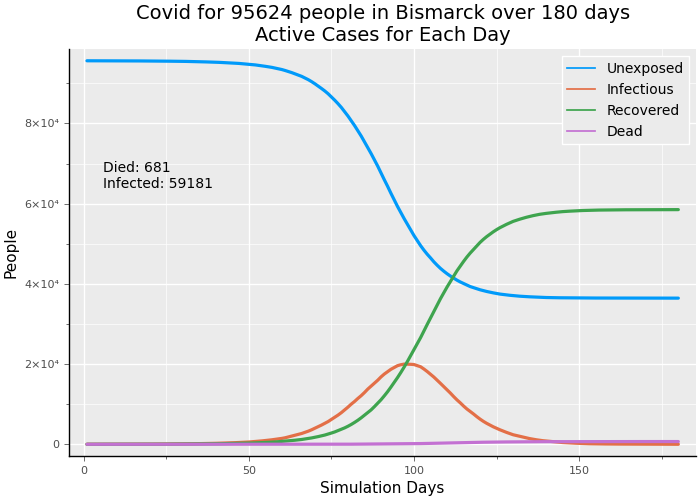

In [279]:
bisfull=cumplot(series,bismarck.fips,geo=geo)

In [280]:
infection_outcome(series, bismarck.fips)

(infect_pop = 0.6189943316112029, death_pct = 0.011505905012925135, death_pop = 0.007122089983057583)

In [281]:
str_50 = sd_gen(start=50, comply=.9, cf=(.5,1.2), tf=(.18,.42))
alldict, env, series = run_a_sim(180, bismarck.fips, showr0=false, silent=true,
    spreadcases=[str_50],
    runcases=[seed_1_6]);

*** seed day 1 locale 38015....
Simulation completed for 180 days.


# Moderately Strong Social Distancing starts on Day 50

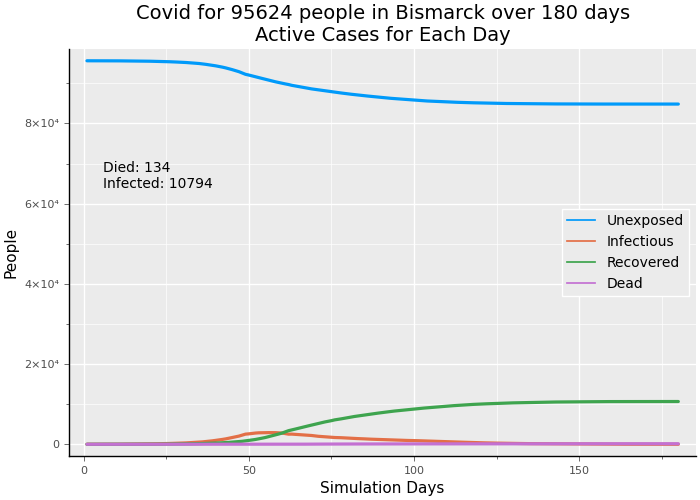

In [282]:
bissd50=cumplot(series,bismarck.fips,geo=geo)

In [283]:
infection_outcome(series, bismarck.fips)

(infect_pop = 0.11298081951097073, death_pct = 0.012403961862445616, death_pop = 0.0014014097764019327)

In [284]:
open = sd_gen(start=80, comply=0.7, cf=(.5,1.5), tf=(.25,.50))

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [285]:
alldict, env, series = run_a_sim(180,bismarck.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6]);

*** seed day 1 locale 38015....
Simulation completed for 180 days.


# With low cases and deaths very low-->open up significantly, but not completely

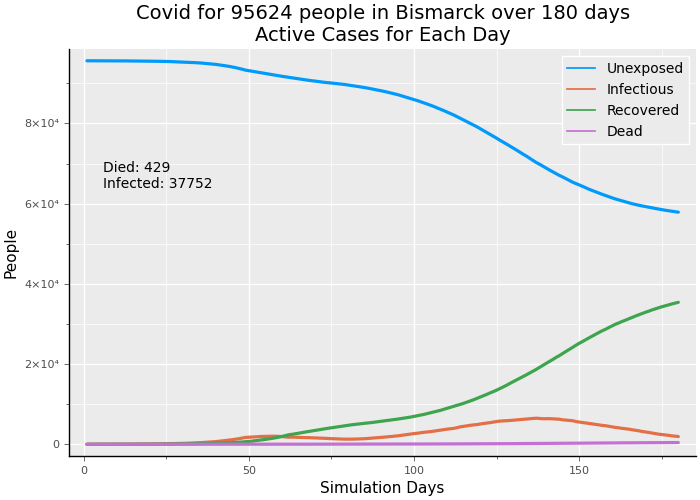

In [286]:
bisopen=cumplot(series,bismarck.fips,geo=geo)

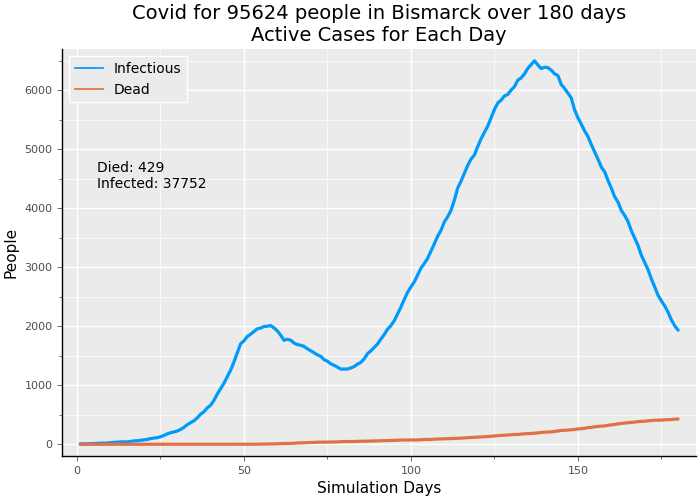

In [287]:
bisbump=cumplot(series,bismarck.fips,[infectious, dead],geo=geo)

In [288]:
infection_outcome(series, bismarck.fips)

(infect_pop = 0.4151101257085486, death_pct = 0.010808223319560616, death_pop = 0.004486602940868874)

# Adopt Test, Trace and Isolate

In [289]:
t_n_t100_160=CovidSim.t_n_t_case_gen(100,160,tc_perday=1000, test_delay=3,
    breakout_pct=0.2, q_comply=0.75,past_contacts=false)

(::CovidSim.var"#scase#50"{CovidSim.var"#scase#49#51"{Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Bool,Bool,Int64,Int64}}) (generic function with 1 method)

In [290]:
alldict, env, series = run_a_sim(180, bismarck.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6, t_n_t100_160]);

*** seed day 1 locale 38015....


┌ Warning: Attempt to isolate more people than were in the category: proceeding with available.
└ @ CovidSim /Users/lewis/.julia-local-packages/Covid/src/transition.jl:249
┌ Warning: Attempt to isolate more people than were in the category: proceeding with available.
└ @ CovidSim /Users/lewis/.julia-local-packages/Covid/src/transition.jl:249


Simulation completed for 180 days.


# Apply Test, Trace and Isolate 
- test capacity of 1% of population per day
- quarantine compliance of 75%
- delay of 3 days returning test results

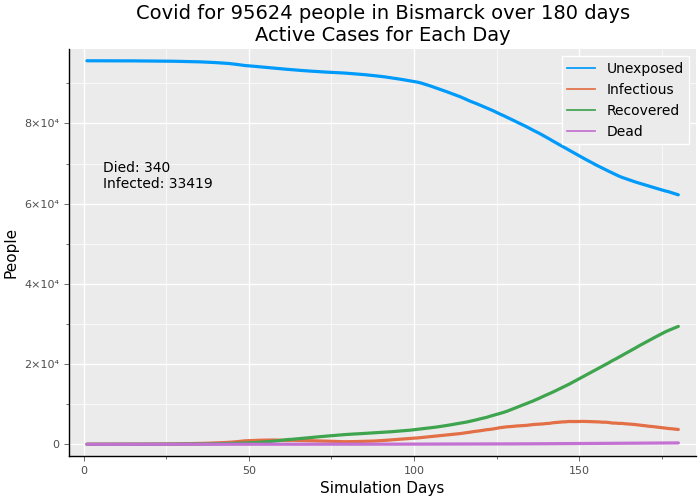

In [291]:
cumplot(series,38015,geo=geo)

# Apply Test, Trace and Isolate--raising test capacity to 5% of population

- 4800 tests per day (roughly 5% of population)
- quarantine compliance of 95%
- test results returned same day

In [292]:
t_n_t100_160=CovidSim.t_n_t_case_gen(100,160,tc_perday=4800, test_delay=0,
    breakout_pct=0.20, q_comply=0.95, past_contacts=false)

(::CovidSim.var"#scase#50"{CovidSim.var"#scase#49#51"{Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Bool,Bool,Int64,Int64}}) (generic function with 1 method)

In [293]:
alldict, env, series = run_a_sim(180,bismarck.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6, t_n_t100_160]);

*** seed day 1 locale 38015....
Simulation completed for 180 days.


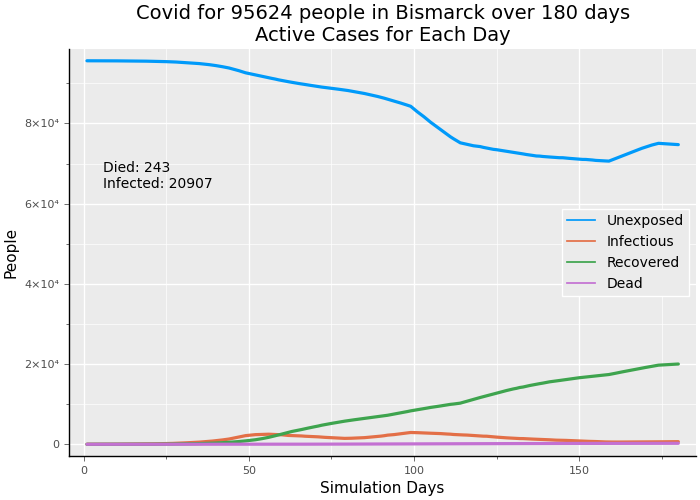

In [294]:
cumplot(series,bismarck.fips,geo=geo)

# Apply Test, Trace and Isolate
- testing capacity of 10% of the population
- quarantine compliance of 97%
- delay in obtaining test results of 0 days

In [295]:
t_n_t100_160=CovidSim.t_n_t_case_gen(100,160,tc_perday=10_000, test_delay=0,
    breakout_pct=0.20, q_comply=0.97,past_contacts=false)

(::CovidSim.var"#scase#50"{CovidSim.var"#scase#49#51"{Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Bool,Bool,Int64,Int64}}) (generic function with 1 method)

In [296]:
alldict, env, series = run_a_sim(180, bismarck.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6, t_n_t100_160]);

*** seed day 1 locale 38015....


┌ Warning: Attempt to isolate more people than were in the category: proceeding with available.
└ @ CovidSim /Users/lewis/.julia-local-packages/Covid/src/transition.jl:249


Simulation completed for 180 days.


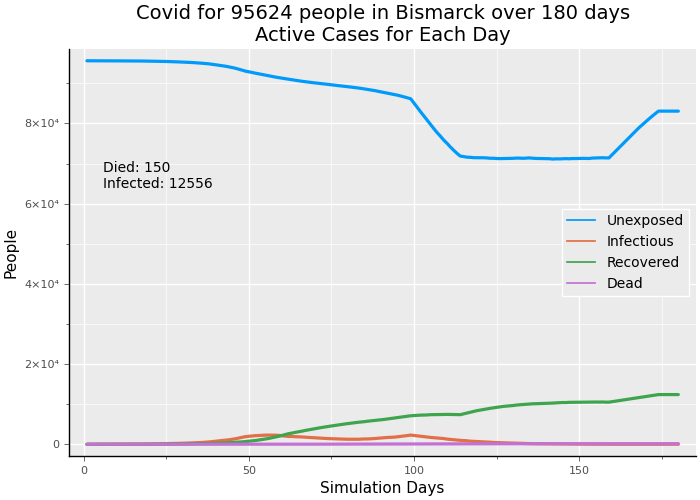

In [297]:
cumplot(series,bismarck.fips,geo=geo)

# Very large city: no social distancing

In [298]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
    spreadcases=[],
    runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


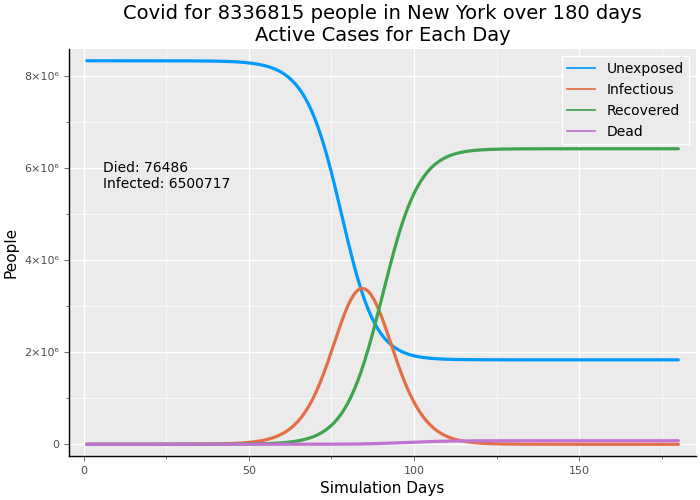

In [299]:
nycfull=cumplot(series, newyork.fips, geo=geo)

In [300]:
infection_outcome(series, newyork.fips)

(infect_pop = 0.7797615370581238, death_pct = 0.011765768207628598, death_pop = 0.009174493502250082)

In [301]:
str_50 = sd_gen(start=50, comply=.9, cf=(.5,1.2), tf=(.18,.42))
alldict, env, series = run_a_sim(180, newyork.fips, showr0=false, silent=true,
    spreadcases=[str_50],
    runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


# Moderately Strong Social Distancing starts on Day 50

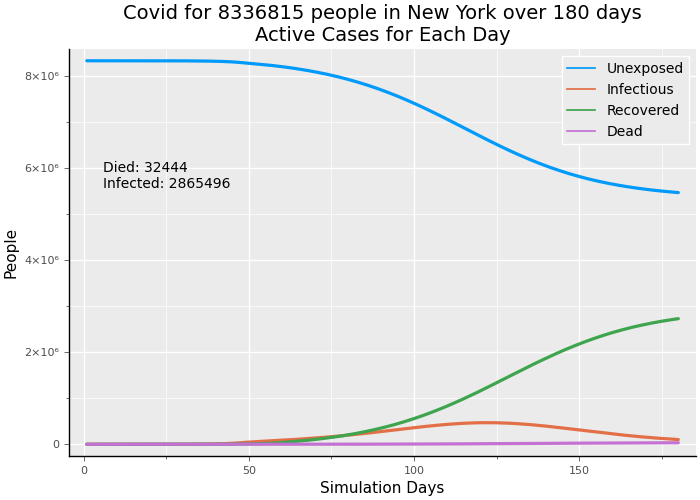

In [302]:
nycsd50=cumplot(series,newyork.fips,geo=geo)

Note: The total of deaths is a bit higher than NYC deaths as of May 23 at 21086, which is day 122, while the simulation is run for almost another 2 months.

In [303]:
infection_outcome(series, newyork.fips)

(infect_pop = 0.35600383791928064, death_pct = 0.01093150256609307, death_pop = 0.003891656867753597)

In [304]:
open = sd_gen(start=95, comply=0.7, cf=(.5,1.5), tf=(.25,.50))

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [305]:
alldict, env, series = run_a_sim(180, newyork.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


# With declining cases and declining deaths-->open up later on day 95

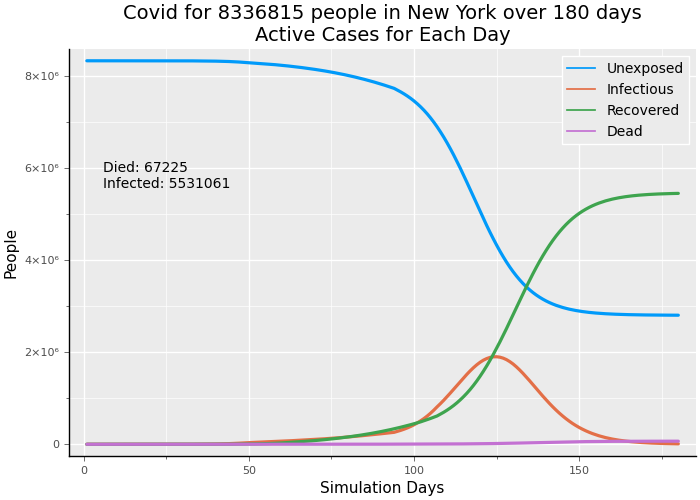

In [306]:
nycopen=cumplot(series,newyork.fips,geo=geo)

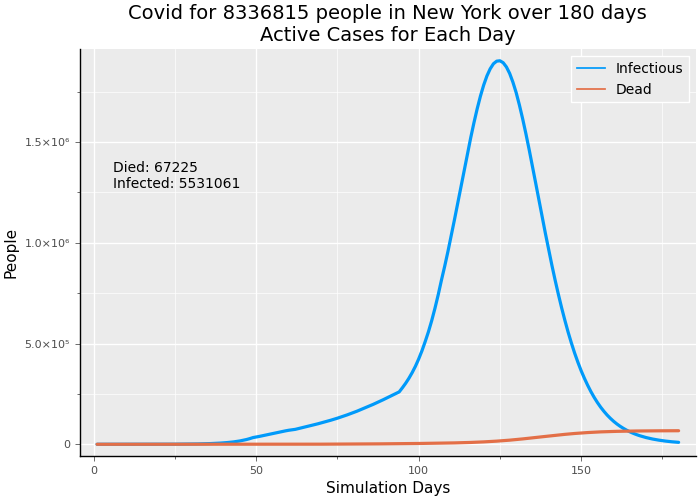

In [307]:
nycbump=cumplot(series, newyork.fips, [infectious, dead],geo=geo)

Note: We don't see a "double-dip" pattern for New York City because the original curve of infection had not turned as sharply down, but had moderated considerably. When opening occurs, the infection rate looks like unrestrained virus transmission.

In [308]:
t_n_t100_160=CovidSim.t_n_t_case_gen(100,160,tc_perday=80_000,breakout_pct=0.20, q_comply=0.75,past_contacts=false)

(::CovidSim.var"#scase#50"{CovidSim.var"#scase#49#51"{Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Bool,Bool,Int64,Int64}}) (generic function with 1 method)

In [309]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6, t_n_t100_160]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


# Apply Test, Trace and Isolate: 
- 80,000 tests per day 
- quarantine compliance of 75%
- delay in returning test results of 3 days

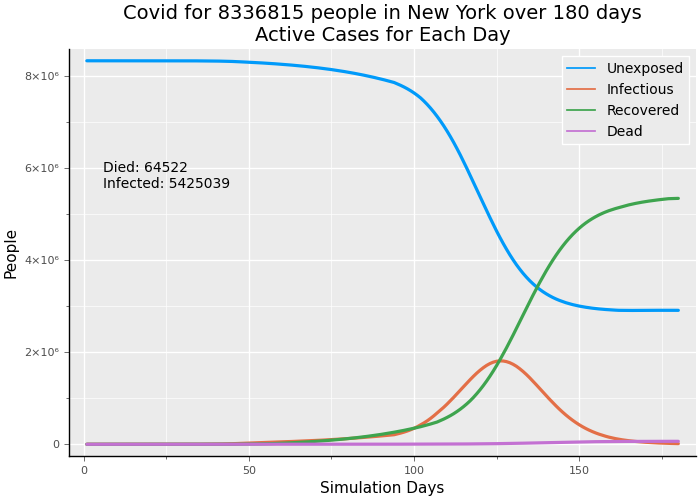

In [310]:
cumplot(series,newyork.fips,geo=geo)

# Apply Test, Trace and Isolate 

- 835,000 tests per day (roughly 10% of population)
- quarantine compliance of 95%
- test results returned same day

In [250]:
t_n_t100_160=CovidSim.t_n_t_case_gen(100,160,tc_perday=835_000, test_delay=0,
    breakout_pct=0.20, q_comply=0.95, past_contacts=false)

(::CovidSim.var"#scase#50"{CovidSim.var"#scase#49#51"{Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Bool,Bool,Int64,Int64}}) (generic function with 1 method)

In [251]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6, t_n_t100_160]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


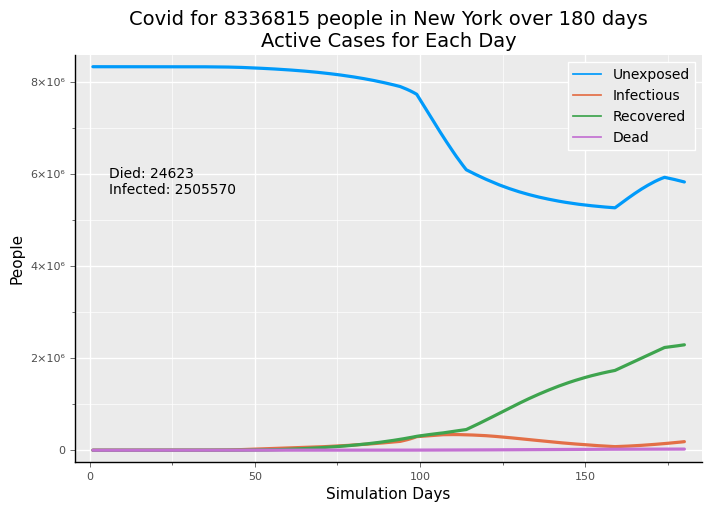

In [252]:
cumplot(series,newyork.fips,geo=geo)

Note: returning tests results same day results in 25% reduction in deaths compared to a delay of 3 days. 

# Apply Test, Trace and Isolate--raising test capacity to 5% of population

- 420,000 tests per day (roughly 5% of population)
- quarantine compliance of 95%
- test results returned same day

In [253]:
t_n_t100_160=CovidSim.t_n_t_case_gen(100,160,tc_perday=420_000, test_delay=0,
    breakout_pct=0.20, q_comply=0.95, past_contacts=false)

(::CovidSim.var"#scase#50"{CovidSim.var"#scase#49#51"{Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Bool,Bool,Int64,Int64}}) (generic function with 1 method)

In [254]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
    spreadcases=[str_50, open],
    runcases=[seed_1_6, t_n_t100_160]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


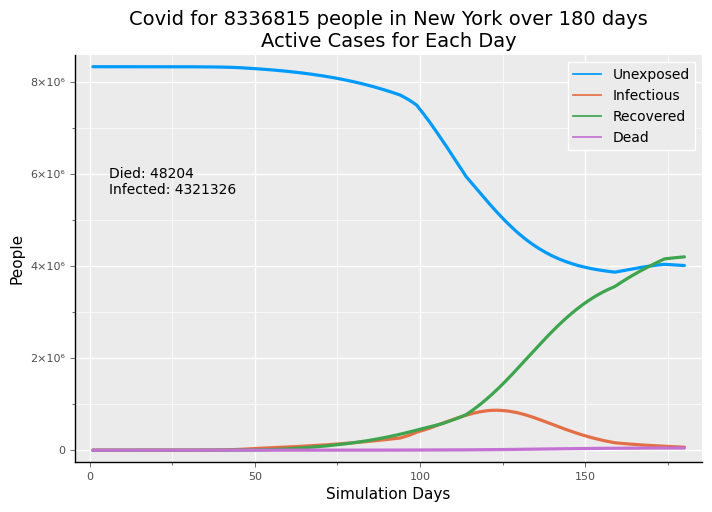

In [255]:
cumplot(series,newyork.fips,geo=geo)